In [1]:
import geopandas as gpd
import sys
import os

from Source.ObservationPointSelector import ParkObservationPointSelector
from Source.ParkPhotographer import ParkPhotographerGeoJSON
from Source.BoundarySampler import BoundarySampler
from Source.Data_Retrieval.OSMnXRetriever import OSMnXWalkCityRetriever

Open the Geojson with the park polygons

In [2]:
gdf = gpd.read_file(os.path.join(os.getcwd(), "Data", "park_polygons.geojson"))
print(f"The number of parks is {len(gdf['geometry'])}")

The number of parks is 19


### Getting images of a park

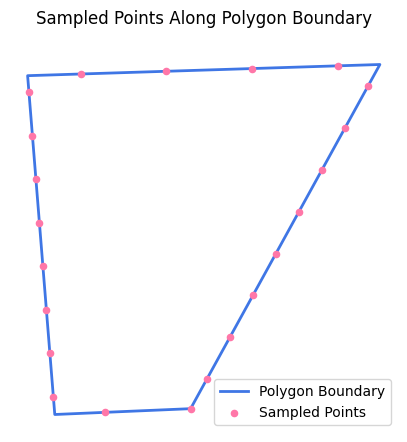

In [3]:
#Get the polygon 
index = 0 
polygon = gdf["geometry"][index]

#Sample points on its boundary
boundarySampler = BoundarySampler(polygon)
deltaMeters = 10
points = boundarySampler.samplePointsInBoundary(deltaPhoto = deltaMeters)
boundarySampler.plotSampledPoints(deltaPhoto=deltaMeters, width = 5, height = 5)


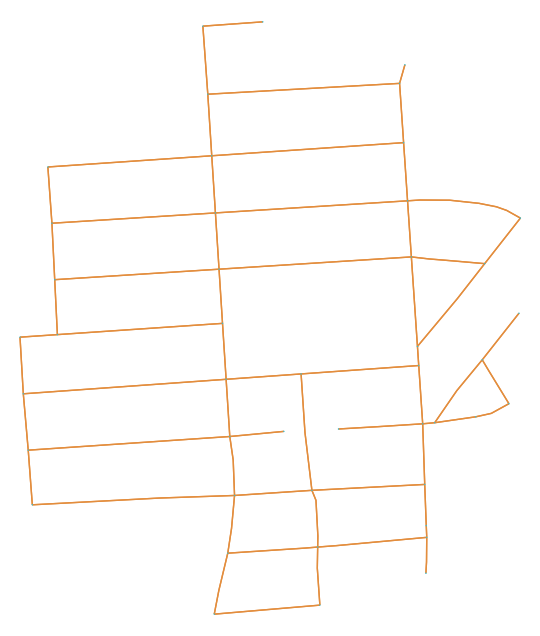

Exported Geojson


In [5]:
#Get the street network from which the points could be visualized
osmnxRetriever = OSMnXWalkCityRetriever()
#Get the outer polygon
convexHull = gpd.GeoDataFrame(geometry=[boundarySampler.polygonGeometry], crs="EPSG:4326")
convexHull = convexHull.geometry.iloc[0].buffer(0.002)

#Get the street network and save it
graph = osmnxRetriever.getGraphFromPolygon(convexHull)
osmnxRetriever.drawGraph(graph)
pathOutput = os.path.join(os.getcwd(), "Data", "street_network.geojson")
osmnxRetriever.exportGeoJSON(graph,pathOutput)

100%|██████████| 22/22 [00:00<00:00, 1419.28it/s]


Skipped: 7 boundary points
{'longitude': -107.415365784631, 'latitude': 24.747414481389065, 'heading': 90.52646656531323, 'distance': 4.139387850834169, 'targetIdx': 0, 'orthogonality_deviation': 0.7751125794436433}


100%|██████████| 22/22 [00:00<00:00, 1394.76it/s]

Skipped: 7 boundary points


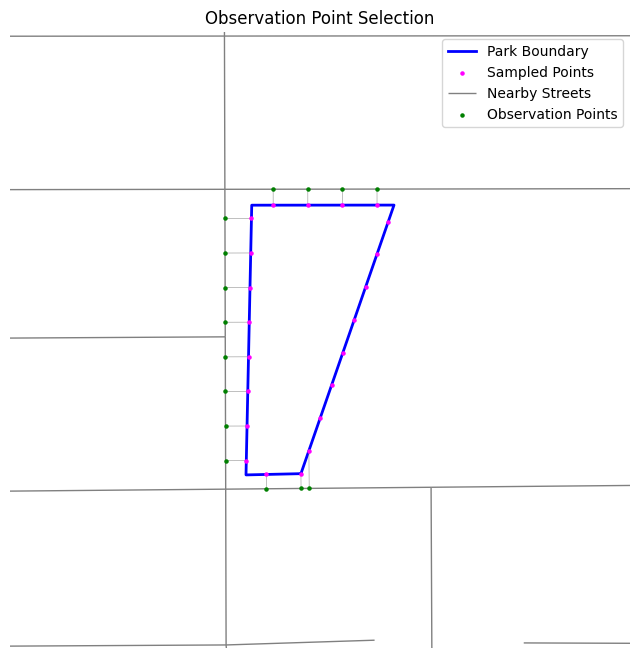

In [13]:
import geopandas as gpd
from shapely.geometry import LineString, Point

#Open the street network
streetNetworkGDF = gpd.read_file(pathOutput)
boundaryPointsGDF = gpd.GeoDataFrame(geometry=[Point(p) for p in points], crs="EPSG:4326")
#Obtain the observation points
selector = ParkObservationPointSelector(
    boundaryPointsGDF= boundaryPointsGDF, 
    streetNetworkGDF=streetNetworkGDF,  
    parkPolygon=polygon,  
    obstacleGDF=None,  
    projectedCRS="EPSG:32614"
)

#Observation points have the parameters needed to know where to point the camera
observationPoints, skipped = selector.selectOptimalPoints(distanceThreshold=20)

print(observationPoints[0])
selector.plotObservationPoints(distanceThreshold=20)

In [16]:
apiKey = ""
parkPhotographer = ParkPhotographerGeoJSON(apiKey)

outputPathImages = os.path.join(os.getcwd(), "Data", "Park")
#Use verbose = False if you don't want the text output
parkPhotographer.captureMultipleViewsForPark(observationPoints,outputPathImages, polygon)

Image captured and registered: Park/park_view_0/359/gsv_0.jpg
Image captured and registered: Park/park_view_1/89/gsv_0.jpg
Image captured and registered: Park/park_view_2/89/gsv_0.jpg
Image captured and registered: Park/park_view_3/89/gsv_0.jpg
Image captured and registered: Park/park_view_4/89/gsv_0.jpg
Image captured and registered: Park/park_view_5/89/gsv_0.jpg
Image captured and registered: Park/park_view_6/89/gsv_0.jpg
Image captured and registered: Park/park_view_7/89/gsv_0.jpg
Image captured and registered: Park/park_view_8/89/gsv_0.jpg
Image captured and registered: Park/park_view_9/179/gsv_0.jpg
Image captured and registered: Park/park_view_10/179/gsv_0.jpg
Image captured and registered: Park/park_view_11/179/gsv_0.jpg
Image captured and registered: Park/park_view_12/179/gsv_0.jpg
Image captured and registered: Park/park_view_13/359/gsv_0.jpg
Image captured and registered: Park/park_view_14/359/gsv_0.jpg
